# MNIST dataset

In [1]:
from __future__ import division

In [2]:
import numpy as np

In [3]:
import keras

/home/matteo/miniconda3/envs/tf2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from keras.models import Sequential

In [5]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

### Dataset loading

In [6]:
from keras.datasets import cifar10

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Sample visualization

In [9]:
import matplotlib.pyplot as plt

In [10]:
classes_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck' # 9
]

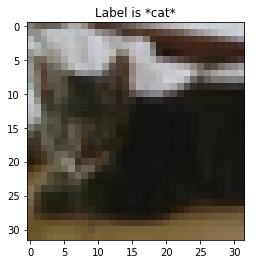

In [11]:
sample_index = 9

pixels = x_train[sample_index]
label = y_train[sample_index]

plt.title(r'Label is *{label}*'.format(label=classes_names[label[0]]))
plt.imshow(pixels)
plt.show()

In [12]:
# To categorical 

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Define network architecture

In [13]:
model = Sequential()

# Two conv2d (32) + maxpool + dropout
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Output size = 16 x 16 x 32

# Two conv2d (64) + maxpool + dropout
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Output size = 8 x 8 x 64

# Two conv2d (128) + maxpool + dropout
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Output size = 4 x 4 x 128


# Flatten
model.add(Flatten())

# First FC layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

# First FC layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# initiate Adam optimizer
opt = keras.optimizers.Adam(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

### Train model

In [14]:
# Various hyperparameters
batch_size = 64
epochs = 100

In [ ]:
model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    shuffle=True
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
